## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

import warnings
warnings.filterwarnings ("ignore")

pd.set_option('display.max_rows', 500)

sns.set_style('darkgrid')

## Load Data

In [2]:
dataset = pd.read_csv('bank.csv')

In [3]:
dataset.head()

,age,job,marital,education,defaults,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
dataset = dataset.rename(columns={'deposit':'response'})

Input variables:
### Data Customer Bank:
1 - age (numeric) : Umur customer

2 - job : Tipe dari pekerjaan Customer

3 - marital : Status perkawinan Customer

4 - education : Pendidikan Customer

5 - default: Memiliki kredit secara default?

6 - balance: Simpanan atau saldo yang dimiliki oleh customer.

7 - housing: Memiliki pinjaman rumah?

8 - loan: Memiliki pinjaman pribadi?
### Field yang berhubungan dengan campaign terakhir dilakukan
9 - contact: Type contact komunikasi

10 - month: Bulan terakhir dihubungi

11 - day: Hari terakhir ketika dihubungi

12 - duration: Durasi terakhir ketika dihubungi dalam detik. Catatan penting: Field ini sangat berefek pada output target Misalkan duration=0 then y='no'. Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah panggilan berakhir, y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan benchmark dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.

### Field lain:
13 - campaign: jumlah kontak yang dilakukan selama kampanye ini.

14 - pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya

15 - previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini

16 - poutcome: hasil dari kampanye pemasaran sebelumnya

## Target
17 response: target atau response customer dari marketing campaign

## Sneak Peak to Data

In [5]:
#Check size of data
print ("Jumlah baris dataset adalah {}".format(dataset.shape[0]))
print ("Jumlah kolom dataset adalah {}".format(dataset.shape[1]))

Jumlah baris dataset adalah 11162
Jumlah kolom dataset adalah 17


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
defaults     11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
response     11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Terlihat terdapat 10 kolom bertipe kategorikal dan 7 kolom bertipe numerik, kemudian tidak terdapat missing value.

In [7]:
## Check unique value for each categorical column
data_kategorikal = dataset.dtypes[dataset.dtypes == 'object'].index

for cols in data_kategorikal:
    print ("Unique value dari kolom {} adalah: \n".format(cols), dataset[cols].unique())

Unique value dari kolom job adalah: 
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Unique value dari kolom marital adalah: 
 ['married' 'single' 'divorced']
Unique value dari kolom education adalah: 
 ['secondary' 'tertiary' 'primary' 'unknown']
Unique value dari kolom defaults adalah: 
 ['no' 'yes']
Unique value dari kolom housing adalah: 
 ['yes' 'no']
Unique value dari kolom loan adalah: 
 ['no' 'yes']
Unique value dari kolom contact adalah: 
 ['unknown' 'cellular' 'telephone']
Unique value dari kolom month adalah: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique value dari kolom poutcome adalah: 
 ['unknown' 'other' 'failure' 'success']
Unique value dari kolom response adalah: 
 ['yes' 'no']


In [8]:
dataset['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24,  1, 10, 22, 25, 31],
      dtype=int64)

In [9]:
dataset[['age', 'balance', 'duration', 'pdays', 'previous']].describe()

,age,balance,duration,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,51.330407,0.832557
std,11.913369,3225.413326,347.128386,108.758282,2.292007
min,18.000000,-6847.000000,2.000000,-1.000000,0.000000
25%,32.000000,122.000000,138.000000,-1.000000,0.000000
50%,39.000000,550.000000,255.000000,-1.000000,0.000000
75%,49.000000,1708.000000,496.000000,20.750000,1.000000
max,95.000000,81204.000000,3881.000000,854.000000,58.000000


#### Ringkasan:

Age:

* Variabel age memiliki rata-rata sebesar 41.231948. Artinya, rata-rata umur customer yang dilakukan campaign adalah 41.231948.
* Variable age memiliki nilai median di 39.000000. Artinya, umur customer yang dilakukan campaign berpusat di 39.000000.
* Variabel age memiliki standar deviasi sebesar 11.913369, sehingga memiliki variansi sebesar 141.92836093. Artinya, Penyebaran umur customer yang dilakukan campaign menyebar sebesar 141.92836093 dari rata rata umur customer. Lalu, karena nilai standar deviasi < mean maka dapat disimpulkan bahwa nilai mean representasi yang baik dari keseluruhan data.

Balance:
* Variable balance memiliki rata-rata sebesar 1528.538524. Artinya, rata-rata simpanan uang customer adalah 1528.538524
* Variable balance memilki nilai median di 550.000000. Artinya simpanan seluruh customer yang dilakukan campaign berpusat di 550.000000.
* Variable balance memiliki standard deviasi sebesar 3225.413326, sehingga memiliki variansi 10403291.1235. Artinya penyebaran simpanan uang customer yang dilakukan campaign sebesar 10403291.1235 dari rata-rata simpanan uang customer. Lalu, karena nilai standar deviasi > mean maka dapat disimplkan bahwa nilai mean representasi yang buruk dari keseluruhan data.

Duration:
* Variable duration memiliki rata-rata sebesar 371.993818. Artinya, rata-rata duration dilakukan campaign terhadap customer adalah 371.993818 detik atau sekitar 6 menit 2 detik.
* Variable duration memiliki nilai median di 255.000000. Artinya, duration ketika dilakukan campaign terhadap customer berpusat di 255.000000 detik atau 4 menit 25 detik.
* Variable duration memiliki standard deviasi sebesar 347.128386, sehingga memiliki variansi 120498.116367. Artinya penyebaran duration ketika dilakukan campaign sebesar 120498.116367 dari rata-rata duration ketika dilakukan campaign. Lalu, karena nilai standar deviasi < mean maka dapat disimplkan bahwa nilai mean representasi yang baik dari keseluruhan data.

## Data Understanding Univariate Analysis

### Categorical EDA

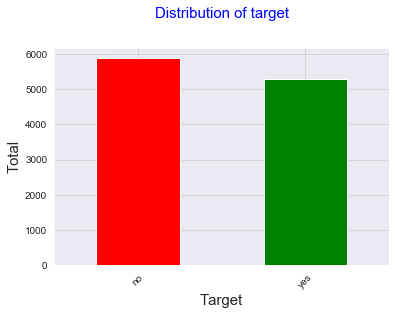

no     5873
yes    5289
Name: response, dtype: int64

In [10]:
##Check Distribution of Target
plt.clf()
dataset['response'].value_counts().sort_values(ascending=False).plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of target', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Target', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.xticks(rotation=45)
plt.show()

dataset['response'].value_counts()

Terlihat bahwa lebih dominan untuk meresponse tidak, dan target dari dataset tidak seimbang

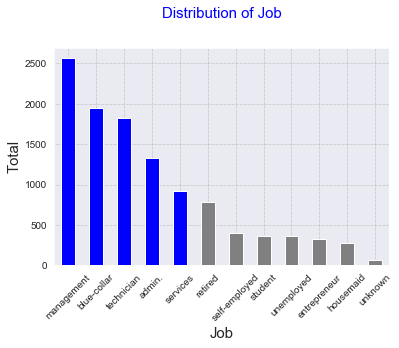

In [11]:
##Check Distribution of Job
plt.clf()
dataset['job'].value_counts().sort_values(ascending=False).plot(kind='bar', color = ['blue', 'blue', 'blue', 'blue', 'blue', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.title('Distribution of Job', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Job', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.xticks(rotation=45)
plt.show()

* Terlihat yang lebih mendominan adala tipe pekerja di suatu perusahaan.
* Variable ini bisa dibuat dummies

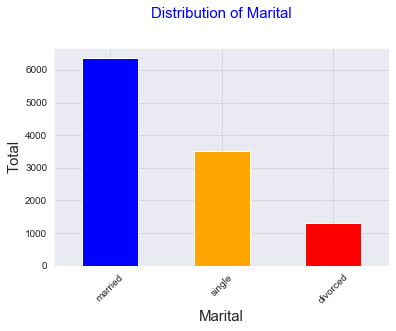

In [12]:
##Check Distribution of marital
plt.clf()
dataset['marital'].value_counts().sort_values(ascending=False).plot(kind='bar', color = ['blue', 'orange', 'red'])
plt.title('Distribution of Marital', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Marital', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.xticks(rotation=45)
plt.show()

* Terlihat status perkawinan yang lebih mendominan adalah tipe married.
* Variable ini bisa dibuat dummies

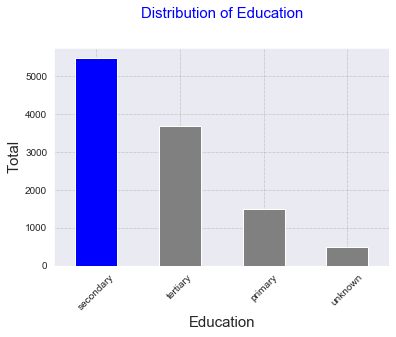

In [13]:
##Check Distribution of Education
plt.clf()
dataset['education'].value_counts().sort_values(ascending=False).plot(kind='bar', color = ['blue', 'gray', 'gray', 'gray'])
plt.title('Distribution of Education', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Education', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.xticks(rotation=45)
plt.show()

* Terlihat bahwa jenis education yang mendominasi adalah jenis education secondary
* Variable ini bisa dibuat dummies

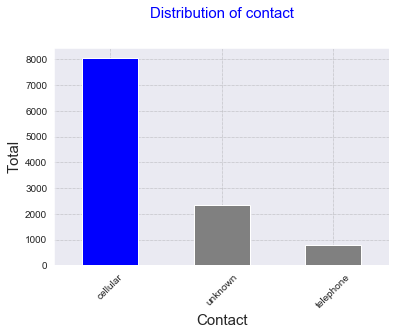

In [14]:
##Check Distribution of Contact
plt.clf()
dataset['contact'].value_counts().sort_values(ascending=False).plot(kind='bar', color = ['blue', 'gray', 'gray'])
plt.title('Distribution of contact', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Contact', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.xticks(rotation=45)
plt.show()

* Terlihat bahwa jenis cellular yang mendominasi
* Variable ini bisa dibuat dummies

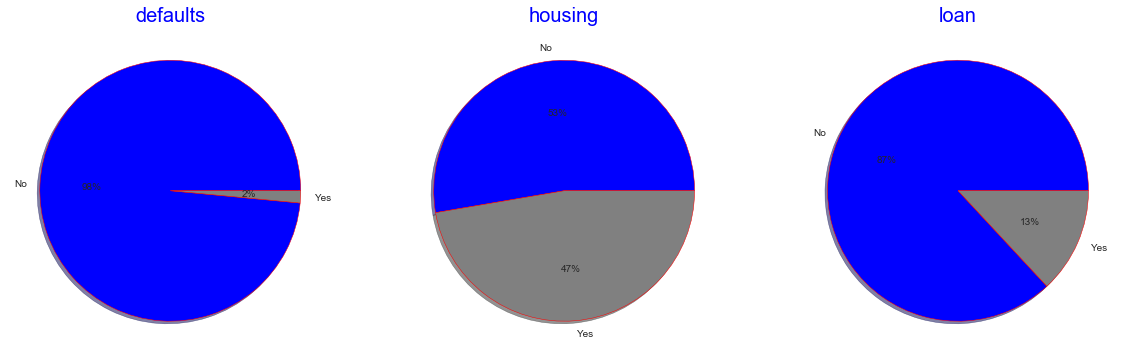

In [15]:
## Distribution of Default, Housing and loan
cols = ['defaults', 'housing', 'loan']
fig, axarr = plt.subplots(1, 3, figsize=(20, 6))
for i in cols:
    index = cols.index(i)
    variabel = dataset[i].value_counts()
    plt.subplot(1, 3, index + 1)
    plt.pie(
            variabel, 
            labels=['No', 'Yes'], 
            autopct='%.0f%%',
            shadow = True, 
            wedgeprops = {'linewidth' : 0.5, 'edgecolor' : "red"},
            colors=('blue', 'gray')
    )
    plt.title(i, fontsize=20, color='blue')

* Berdasarkan grafik di atas kita ketahui bahwa customer secara default tidak memiliki kredit.
* Perbandingan antara customer memiliki pinjaman rumah atau tidak cukup seimbang
* Kemudian, perbandingan antara customer memiliki pinjaman atau tidak, lebih dominan customer yang tidak memiliki pinjaman.

### Numerical EDA

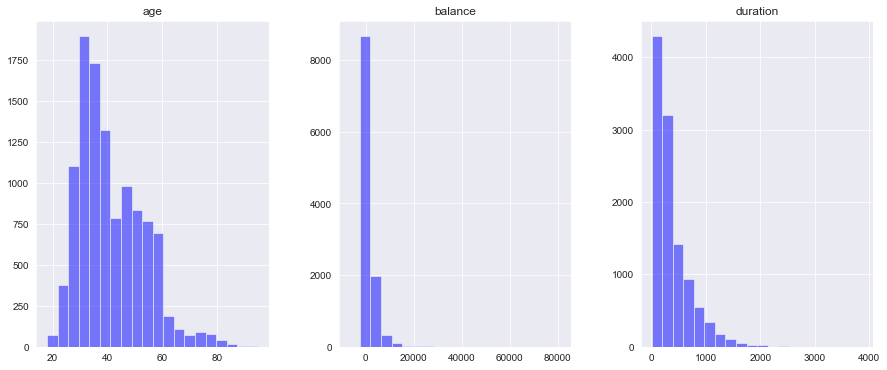

In [16]:
numerical_features = ['age', 'balance', 'duration']

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
dataset[numerical_features].hist(bins=20, color = 'Blue', alpha=0.5, ax=ax)
plt.show()

* Terlihat bahwa density dari umur berada dalam interval 25 sampai 70 tahun.
* Terlihat bahwa density dari balance adalah kurang dari 15000.
* Terlihat bahwa density dari duration adalah kurang dari 1000 detik.

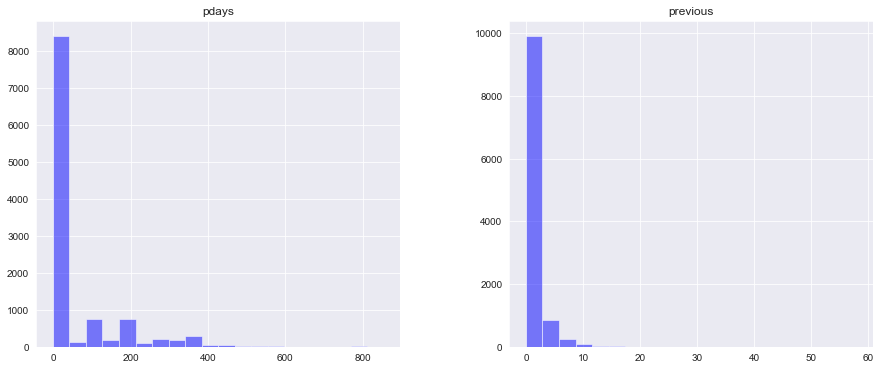

In [17]:
numerical_features = ['pdays', 'previous']

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
dataset[numerical_features].hist(bins=20, color = 'Blue', alpha=0.5, ax=ax)
plt.show()

## Data Understanding Bivariate Analysis

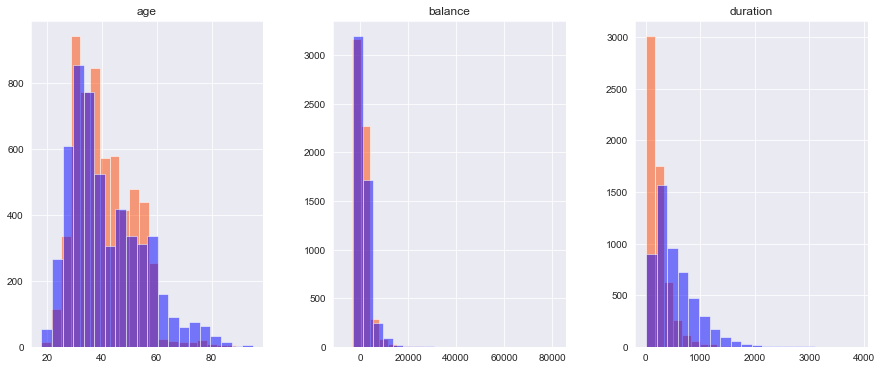

In [18]:
numerical_features = ['age', 'balance', 'duration']

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
dataset[dataset.response == 'no'][numerical_features].hist(bins=20, color = 'orangered', alpha=0.5, ax=ax)
dataset[dataset.response == 'yes'][numerical_features].hist(bins=20, color = 'blue', alpha=0.5, ax=ax)
plt.show()

* Terlihat bahwa pada umur seorang customer tidak ada kecenderungan appaun dalam response campaign.
* Terlihat bahwa distribusi dari balace tidak ada kecenderungan apapun dalam response campaign.
* Terlihat bahwa semakin kecil duration melakukan campaign, maka semakin besar kemungkinan untuk menolak marketing campaign.

In [19]:
proportion_job = dataset.groupby(['job', 'response']).agg({'job': 'count'})
proportion_job= proportion_job.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

proportion_marital = dataset.groupby(['marital', 'response']).agg({'marital': 'count'})
proportion_marital = proportion_marital.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

proportion_education = dataset.groupby(['education', 'response']).agg({'education': 'count'})
proportion_education = proportion_education.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

print ("Proporsi Job\n",proportion_job)
print ("Proporsi Marital\n",proportion_marital)
print ("Proporsi Education\n",proportion_education)

Proporsi Job
                               job
job           response           
admin.        no        52.698651
              yes       47.301349
blue-collar   no        63.580247
              yes       36.419753
entrepreneur  no        62.500000
              yes       37.500000
housemaid     no        60.218978
              yes       39.781022
management    no        49.298519
              yes       50.701481
retired       no        33.676093
              yes       66.323907
self-employed no        53.827160
              yes       46.172840
services      no        60.021668
              yes       39.978332
student       no        25.277778
              yes       74.722222
technician    no        53.922106
              yes       46.077894
unemployed    no        43.417367
              yes       56.582633
unknown       no        51.428571
              yes       48.571429
Proporsi Marital
                      marital
marital  response           
divorced no        51.8948

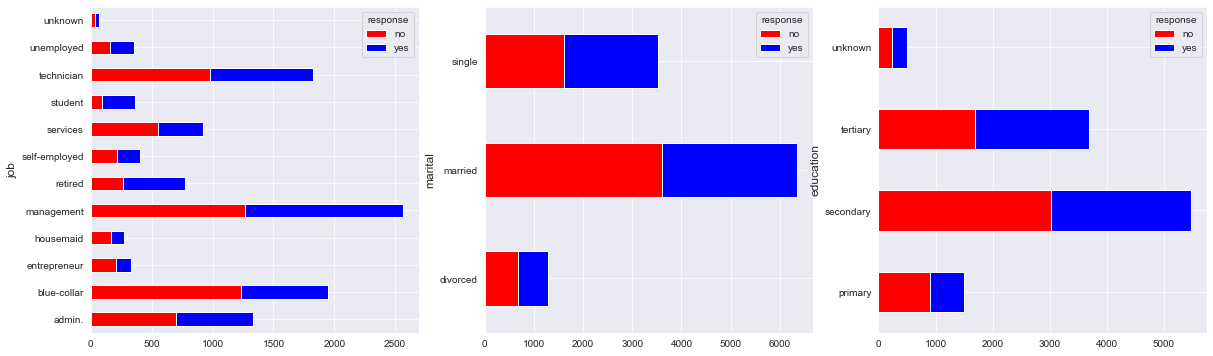

In [20]:
cols = ['job', 'marital', 'education']
fig, axarr = plt.subplots(1, 3, figsize=(20, 6))
for i in cols:
    index = cols.index(i)
    ax = plt.subplot(1, 3, index + 1)
    data = dataset.groupby(i)['response'].value_counts().sort_values(ascending=False).unstack()
    data.plot(ax=ax, kind='barh',stacked=True, colors=['red', 'blue'])
    plt.ylabel(i, fontsize= 12)

* Berdasarkan hasil EDA di atas walaupun jenis pekerjaan management lebih banyak yang dilakukan campaign, tertapi proporsi campaign akan cenderung berhasil pada pekerjaan pelajar, dan para pensiunan.
* Berdasarkan hasil EDA diatas walaupun status perkawianan menikah lebih banyak yang dilakukan campaign, tetapi proporsi campaign akan cenderung berhasil pada status perkawinan single.
* Berdasarkan hasil EDA diatas walaupun jenis pendidikan secondary lebih banyak yang dilakukan campaign, tetapi proporsi campaign akan cenderung berhasil pada status perkawinan teritary.

In [21]:
proportion_defaults = dataset.groupby(['defaults', 'response']).agg({'defaults': 'count'})
proportion_defaults= proportion_defaults.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

proportion_housing = dataset.groupby(['housing', 'response']).agg({'housing': 'count'})
proportion_housing = proportion_housing.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

proportion_loan = dataset.groupby(['loan', 'response']).agg({'loan': 'count'})
proportion_loan = proportion_loan.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

print ("Proporsi defaults\n",proportion_defaults)
print ("Proporsi housing\n",proportion_housing)
print ("Proporsi loan\n",proportion_loan)

Proporsi defaults
                     defaults
defaults response           
no       no        52.364926
         yes       47.635074
yes      no        69.047619
         yes       30.952381
Proporsi housing
                     housing
housing response           
no      no        42.968883
        yes       57.031117
yes     no        63.359212
        yes       36.640788
Proporsi loan
                     loan
loan response           
no   no        50.474129
     yes       49.525871
yes  no        66.849315
     yes       33.150685


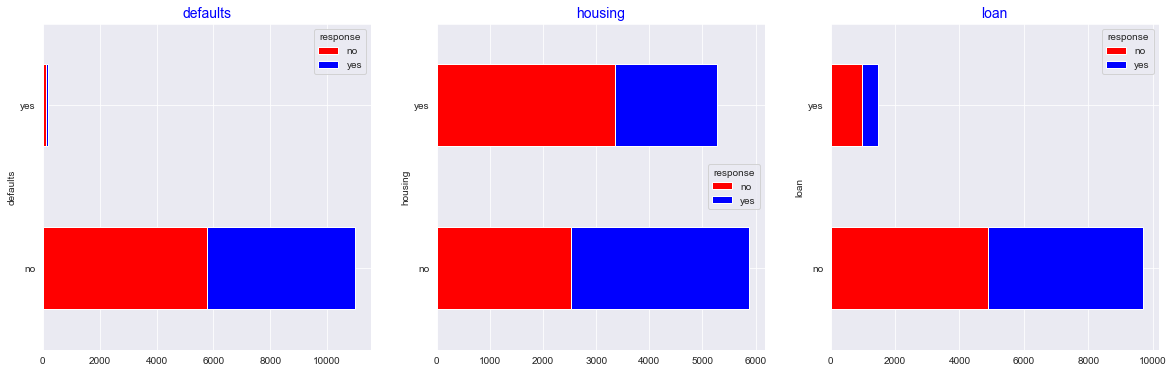

In [22]:
cols = ['defaults', 'housing', 'loan']
fig, axarr = plt.subplots(1, 3, figsize=(20, 6))
for i in cols:
    index = cols.index(i)
    ax = plt.subplot(1, 3, index + 1)
    data = dataset.groupby(i)['response'].value_counts().sort_values(ascending=False).unstack()
    data.plot(ax=ax, kind='barh',stacked=True, colors=['red', 'blue'])
    plt.title(i, fontsize = 14, color='blue')

* Terlihat bahwa customer yang memiliki kredit kemungkinan besar akan menolak campaign, sehingga tidak disarankan melakukan campaign pada customer yang memiliki kredit.
* Terlihat bahwa customer yang memiliki pinjaman rumah lebih dominan menolak campaign, dan campaign terbanyak diterima jika customer tidak memiliki pinjaman rumah sehingga ada kemungkinan yang lebih besar campaign akan diterima jika campaign dilakukan pada customer yang tidak memiliki pinjaman rumah.
* Terlihat bahwa customer yang tidak memiliki pinjaman lebih dominan menolak campaign, namun campaign terbanyak diterima pada customer yang tidak memiliki campaign. Sehingga ada kemungkinan yang lebih besar campaign akan diterima jika campaign dilakukan pada customer yang tidak memiliki pinjaman.

In [23]:
proportion_contact = dataset.groupby(['contact', 'response']).agg({'contact': 'count'})
proportion_contact= proportion_contact.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

proportion_poutcome = dataset.groupby(['poutcome', 'response']).agg({'poutcome': 'count'})
proportion_poutcome = proportion_poutcome.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

print ("Proporsi Contact\n",proportion_contact)
print ("Proporsi Poutcome\n",proportion_poutcome)

Proporsi Contact
                       contact
contact   response           
cellular  no        45.672718
          yes       54.327282
telephone no        49.612403
          yes       50.387597
unknown   no        77.408355
          yes       22.591645
Proporsi Poutcome
                     poutcome
poutcome response           
failure  no        49.674267
         yes       50.325733
other    no        42.830540
         yes       57.169460
success  no         8.683473
         yes       91.316527
unknown  no        59.332212
         yes       40.667788


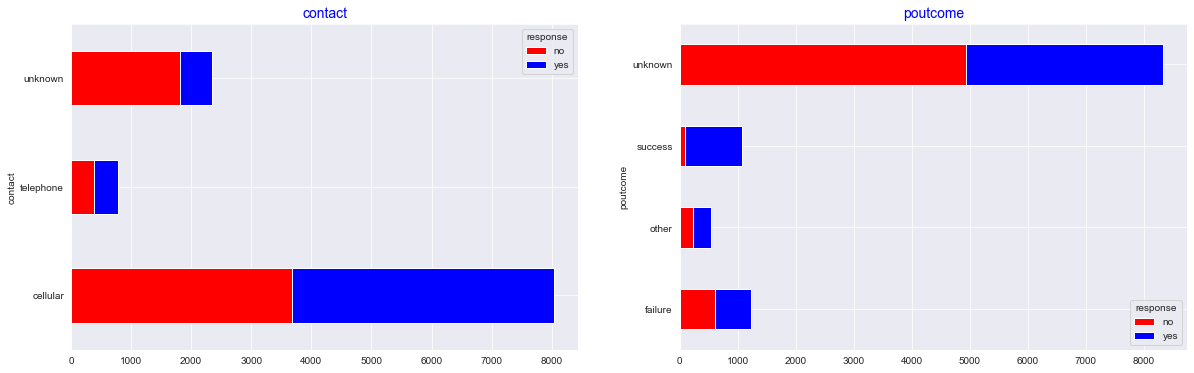

In [24]:
cols = ['contact', 'poutcome']
fig, axarr = plt.subplots(1, 2, figsize=(20, 6))
for i in cols:
    index = cols.index(i)
    ax = plt.subplot(1, 2, index + 1)
    data = dataset.groupby(i)['response'].value_counts().sort_values(ascending=False).unstack()
    data.plot(ax=ax, kind='barh',stacked=True, colors=['red', 'blue'])
    plt.title(i, fontsize = 14, color='blue')

* Terlihat bahwa jenis media cellular ada kemungkinan yang lebih besar campaign akan di terima.
* Terlihat bahwa jika hasil campaign sebelumnya berhasil maka, hasil response selanjutnya kemungkinan juga berhasil.

In [25]:
proportion_day = dataset.groupby(['day', 'response']).agg({'day': 'count'})
proportion_day= proportion_day.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

proportion_month = dataset.groupby(['month', 'response']).agg({'month': 'count'})
proportion_month = proportion_month.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

print ("Proporsi day\n",proportion_day)
print ("Proporsi month\n",proportion_month)

Proporsi day
                     day
day response           
1   no        26.229508
    yes       73.770492
2   no        45.508982
    yes       54.491018
3   no        41.830065
    yes       58.169935
4   no        42.786070
    yes       57.213930
5   no        54.926625
    yes       45.073375
6   no        59.507830
    yes       40.492170
7   no        58.900524
    yes       41.099476
8   no        52.028640
    yes       47.971360
9   no        50.824176
    yes       49.175824
10  no        25.766871
    yes       74.233129
11  no        51.474531
    yes       48.525469
12  no        45.168539
    yes       54.831461
13  no        46.799117
    yes       53.200883
14  no        54.643629
    yes       45.356371
15  no        48.927039
    yes       51.072961
16  no        47.967480
    yes       52.032520
17  no        57.177616
    yes       42.822384
18  no        58.394161
    yes       41.605839
19  no        68.229167
    yes       31.770833
20  no        66.315789
  

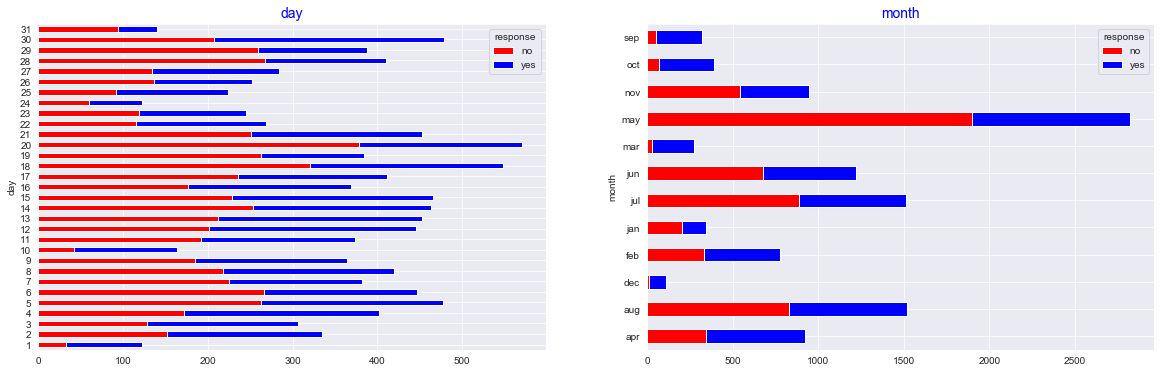

In [26]:
cols = ['day', 'month']
fig, axarr = plt.subplots(1, 2, figsize=(20, 6))
for i in cols:
    index = cols.index(i)
    ax = plt.subplot(1, 2, index + 1)
    data = dataset.groupby(i)['response'].value_counts().sort_values(ascending=False).unstack()
    data.plot(ax=ax, kind='barh',stacked=True, colors=['red', 'blue'])
    plt.title(i, fontsize = 14, color='blue')

* Terlihat bahwa campaign pada awal-awal bulan campaign akan cenderung diterima dibandingkan pada pertengahan bulan ke atas.
* Terlihat bahwa walaupun campaign sering di lakukan pada bulan may, namun tidak efektif. Campaign akan lebih efektif dilakukan pada bulan desember dan maret.

## Feature Engineering

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['defaults', 'housing', 'loan', 'response']

for subscript in cols:
    dataset[subscript] = le.fit_transform(dataset[subscript]);

In [28]:
dataset.head(3)

,age,job,marital,education,defaults,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1


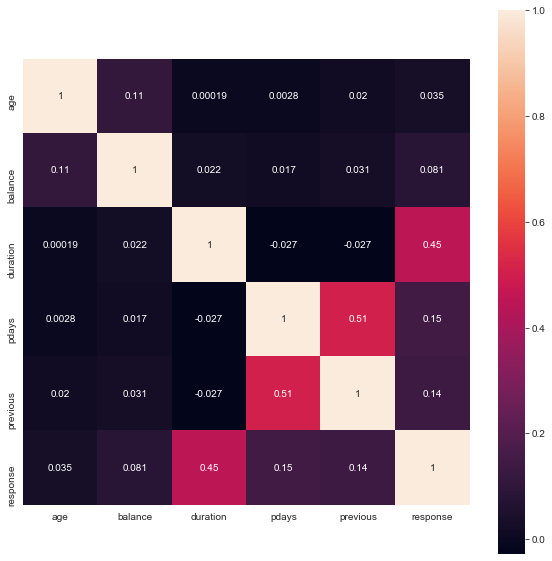

In [29]:
numeric_features = ['age', 'balance', 'duration', 'pdays', 'previous', 'response']

cormat = dataset[numeric_features].corr()

plt.figure(figsize=(10,10))
grafik = sns.heatmap(cormat, square = True, annot = True)
bottom, top = grafik.get_ylim()
grafik.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Column pdays dan previous saling berkorelasi tinggi, tentunya hal ini akan membuat multikolinearitas. Oleh karena itu, salah satu dari kedua feature tersebut tidak digunakan.

In [30]:
#change data type feature day
dataset['day'] = dataset['day'].apply(str)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
defaults     11162 non-null int32
balance      11162 non-null int64
housing      11162 non-null int32
loan         11162 non-null int32
contact      11162 non-null object
day          11162 non-null object
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
response     11162 non-null int32
dtypes: int32(4), int64(6), object(7)
memory usage: 1.3+ MB


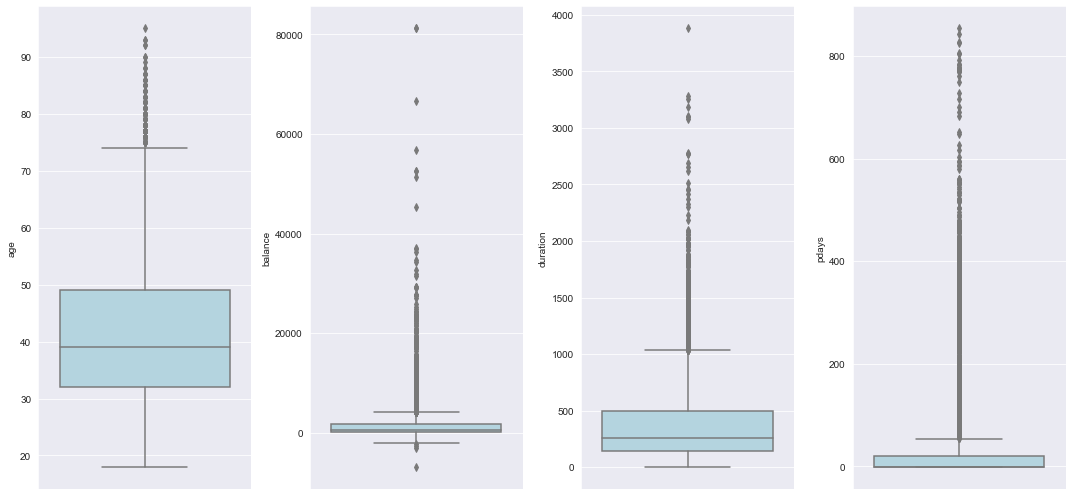

In [32]:
#Check Outlier
num_features = ['age', 'balance', 'duration', 'pdays']
plt.figure(figsize=(15, 7))
for i in range(0, len(num_features)):
    plt.subplot(1, len(num_features), i+1)
    sns.boxplot(y=dataset[num_features[i]],color='lightblue',orient='v')
    plt.tight_layout()

Feature pdays, dan previous memiliki banyak outlier. Oleh karena itu, lebih baik kedua feature tersebut tidak digunakan.

In [33]:
dataset = dataset.drop(['pdays', 'previous'], axis = 1)

In [34]:
dataset = dataset[dataset['balance'] >= 0]

In [35]:
#handle outlier
Q1 = (dataset[['age', 'balance', 'duration']]).quantile(0.25)
Q3 = (dataset[['age', 'balance', 'duration']]).quantile(0.75)

IQR = Q3 - Q1
print (IQR)

for col_name in list(['age', 'balance', 'duration']):
     low_limit = Q1[col_name] - 1.5 * IQR[col_name]
     high_limit = Q3[col_name] + 1.5 * IQR[col_name]
     dataset = dataset[~(dataset[col_name] < low_limit)]
     dataset = dataset[~(dataset[col_name] > high_limit )]

age           17.00
balance     1657.50
duration     353.75
dtype: float64


In [36]:
X = pd.get_dummies(dataset.drop('response', axis = 1))
y = dataset['response']

In [37]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

## Modelling

In [38]:
model1 = GaussianNB()
model1.fit(X_train, y_train)
predicted_train = model1.predict(X_train)
predicted_test = model1.predict(X_test)

training = [accuracy_score(y_train, predicted_train), precision_score(y_train, predicted_train, average='macro'), f1_score(y_train, predicted_train, average='macro'), recall_score(y_train, predicted_train, average='macro')]
testing = [accuracy_score(y_test, predicted_test), precision_score(y_test, predicted_test, average='macro'), f1_score(y_test, predicted_test, average='macro'), recall_score(y_test, predicted_test, average='macro')]

result = pd.DataFrame({
    'Training': training,
    'Testing': testing
}, index=['Accuration Score', 'Precision Score', 'F1-Score', 'Recall Score'])
result.head()

,Training,Testing
Accuration Score,0.736536,0.725057
Precision Score,0.738685,0.728424
F1-Score,0.727557,0.711897
Recall Score,0.725443,0.709672


In [39]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
predicted_train = model2.predict(X_train)
predicted_test = model2.predict(X_test)

training = [accuracy_score(y_train, predicted_train), precision_score(y_train, predicted_train, average='macro'), f1_score(y_train, predicted_train, average='macro'), recall_score(y_train, predicted_train, average='macro')]
testing = [accuracy_score(y_test, predicted_test), precision_score(y_test, predicted_test, average='macro'), f1_score(y_test, predicted_test, average='macro'), recall_score(y_test, predicted_test, average='macro')]

result = pd.DataFrame({
    'Training': training,
    'Testing': testing
}, index=['Accuration Score', 'Precision Score', 'F1-Score', 'Recall Score'])
result.head()

,Training,Testing
Accuration Score,0.991780,0.828798
Precision Score,0.991997,0.827988
F1-Score,0.991681,0.825231
Recall Score,0.991383,0.823462


In [40]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)
predicted_train = model3.predict(X_train)
predicted_test = model3.predict(X_test)

training = [accuracy_score(y_train, predicted_train), precision_score(y_train, predicted_train, average='macro'), f1_score(y_train, predicted_train, average='macro'), recall_score(y_train, predicted_train, average='macro')]
testing = [accuracy_score(y_test, predicted_test), precision_score(y_test, predicted_test, average='macro'), f1_score(y_test, predicted_test, average='macro'), recall_score(y_test, predicted_test, average='macro')]

result = pd.DataFrame({
    'Training': training,
    'Testing': testing
}, index=['Accuration Score', 'Precision Score', 'F1-Score', 'Recall Score'])
result.head()

,Training,Testing
Accuration Score,0.828090,0.835601
Precision Score,0.826899,0.834750
F1-Score,0.825552,0.832286
Recall Score,0.824571,0.830636


In [41]:
model4 = GradientBoostingClassifier()
model4.fit(X_train, y_train)
predicted_train = model4.predict(X_train)
predicted_test = model4.predict(X_test)

training = [accuracy_score(y_train, predicted_train), precision_score(y_train, predicted_train, average='macro'), f1_score(y_train, predicted_train, average='macro'), recall_score(y_train, predicted_train, average='macro')]
testing = [accuracy_score(y_test, predicted_test), precision_score(y_test, predicted_test, average='macro'), f1_score(y_test, predicted_test, average='macro'), recall_score(y_test, predicted_test, average='macro')]

result = pd.DataFrame({
    'Training': training,
    'Testing': testing
}, index=['Accuration Score', 'Precision Score', 'F1-Score', 'Recall Score'])
result.head()

,Training,Testing
Accuration Score,0.851049,0.845805
Precision Score,0.849049,0.843377
F1-Score,0.849722,0.843797
Recall Score,0.850647,0.844273


## Evaluation model

Karena target sedikit tidak seimbang, maka kita gunakan metrik F1-Score.
1. Model Naive Bayes mendapatkan F1-Score 72.7557% untuk training dan 71.1897% untuk testing. Oleh karena itu, disimpulkan bahwa model ini cukup baik untuk melakukan prediksi.
2. Model Random Forest Classifier mendapatkan F1-Score 99.1681% untuk training, dan 82.5231% untuk testing. Oleh karena itu, disimpulkan bahwa model ini overfitting.
3. Model Logistic Regresiion mendapatkan F1-Score 82.5552% untuk training dan 83.2286% untuk testing. Oleh karena itu, disimpulkan bahwa model ini underfitting.
4. Model Gradient Boosting mendapatkan F1-Score 85.0647% untuk training dan 84.4273% untuk testing. Oleh karena itu, disimpulkan bahwa model ini baik untuk melakukan prediksi.

Karena nilai f-1 score model gradient boosting > model naive bayes. Oleh karena itu, model yang akan dipilih adalah **Gradient Boosting**. 

## Hypertuning Parameters

In [51]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RandomizedSearchCV(model4, parameters, cv=5)
cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [52]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [53]:
display(cv)

Best parameters are: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}


0.495 + or -0.075 for the {'n_estimators': 500, 'max_depth': 9, 'learning_rate': 100}
0.306 + or -0.007 for the {'n_estimators': 250, 'max_depth': 1, 'learning_rate': 10}
0.839 + or -0.005 for the {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}
0.383 + or -0.083 for the {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 100}
0.355 + or -0.077 for the {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 100}
0.306 + or -0.007 for the {'n_estimators': 5, 'max_depth': 1, 'learning_rate': 10}
0.824 + or -0.005 for the {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
0.837 + or -0.006 for the {'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.01}
0.819 + or -0.007 for the {'n_estimators': 500, 'max_depth': 1, 'learning_rate': 1}
0.531 + or -0.102 for the {'n_estimators': 50, 'max_depth': 9, 'learning_rate': 10}


## New Training

In [54]:
GBC = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=500)
GBC.fit(X_train, y_train)
predicted_train = GBC.predict(X_train)
predicted_test = GBC.predict(X_test)

training = [accuracy_score(y_train, predicted_train), precision_score(y_train, predicted_train, average='macro'), f1_score(y_train, predicted_train, average='macro'), recall_score(y_train, predicted_train, average='macro')]
testing = [accuracy_score(y_test, predicted_test), precision_score(y_test, predicted_test, average='macro'), f1_score(y_test, predicted_test, average='macro'), recall_score(y_test, predicted_test, average='macro')]

result = pd.DataFrame({
    'Training': training,
    'Testing': testing
}, index=['Accuration Score', 'Precision Score', 'F1-Score', 'Recall Score'])
result.head()

,Training,Testing
Accuration Score,0.901927,0.852608
Precision Score,0.900248,0.850298
F1-Score,0.901072,0.850649
Recall Score,0.902211,0.851036


## Import to Pickle File

In [55]:
import pickle
pickle.dump(GBC, open('gradient_boosting_model.pkl', 'wb'))